<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Ch3.3.ARIMA_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예제 7-1. ARIMA 오차 회귀 모델 예시

### 분기별 미국 소비 변화 ARIMA 오차 회귀 모델 적합

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### 데이터 불러오기

In [2]:
us_change = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.4/us_change.csv")
us_change = us_change[["Consumption","Income", "Production", "Savings", "Unemployment"]]
us_change.index = pd.date_range(start='1970/01/01', periods=198, freq='3MS')

us_change

,Consumption,Income,Production,Savings,Unemployment
1970-01-01,0.618566,1.044801,-2.452486,5.299014,0.9
1970-04-01,0.451984,1.225647,-0.551459,7.789894,0.5
1970-07-01,0.872872,1.585154,-0.358652,7.403984,0.5
1970-10-01,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971-01-01,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...
2018-04-01,0.983112,0.661825,1.117424,-2.723974,0.0
2018-07-01,0.853181,0.806271,1.256722,-0.085686,-0.3
2018-10-01,0.356512,0.695142,0.948148,5.031337,0.2
2019-01-01,0.282885,1.100753,-0.488206,9.760287,-0.1


#### 데이터 시각화

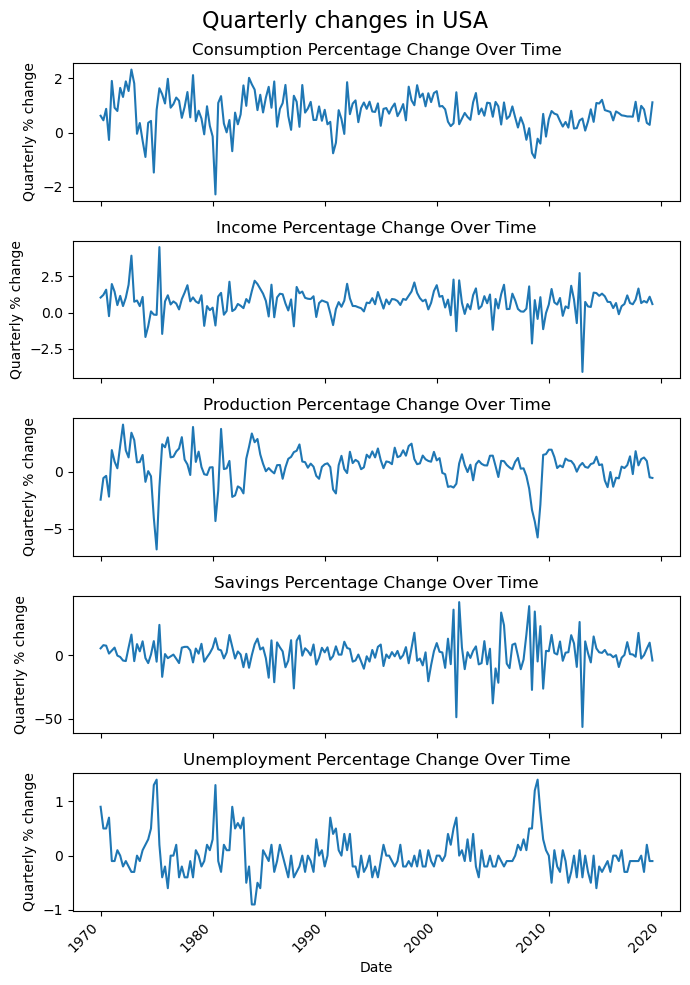

In [3]:
fig, axes = plt.subplots(us_change.shape[1], 1, figsize=(7, 10), sharex=True)

for i, var in enumerate(us_change.columns):
    axes[i].plot(us_change[var], label=var)
    axes[i].set_ylabel("Quarterly % change")
    axes[i].set_title(f'{var} Percentage Change Over Time')

axes[-1].set_xlabel('Date')
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Quarterly changes in USA", fontsize=16)
plt.tight_layout()
plt.show()

#### Adfuller test

In [4]:
print(adfuller(us_change["Consumption"])[1])

0.00012373240927130867


#### ARIMA 파라미터 최적화 함수

In [5]:
def ARIMAX_optimizer(y, X):
    result= []
    for p in range(4):
        for q in range(4):
            try:
                model = SARIMAX(y, X, order=(p, 0, q), simple_differencing=False).fit(dips=False)
            except:
                continue

            aic = model.aic
            result.append([p, q, aic])

    result_df = pd.DataFrame(result)
    result_df.columns = ['p', 'q', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

#### 오차 차수 최적화

In [6]:
result = ARIMAX_optimizer(us_change["Consumption"], us_change[ ["Income", "Production", "Savings", "Unemployment"] ])
result

,p,q,AIC
0,2,1,112.150860
1,2,2,113.009005
2,2,3,114.665171
3,3,2,117.538359
4,3,1,118.221362
5,3,3,120.241474
6,3,0,144.953644
7,2,0,146.860218
8,0,2,148.947838
9,1,1,149.570144


#### ARIMAX 모델 적합

In [7]:
model = SARIMAX(us_change["Consumption"], us_change[ ["Income", "Production", "Savings", "Unemployment"] ], order=(2, 0, 2), simple_differencing=False)
fit = model.fit(disp=False)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  198
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 -47.505
Date:                Fri, 14 Feb 2025   AIC                            113.009
Time:                        01:21:11   BIC                            142.603
Sample:                    01-01-1970   HQIC                           124.988
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Income           0.7268      0.029     24.667      0.000       0.669       0.785
Production       0.0450      0.028      1.610      0.107      -0.010       0.100
Savings         -0.0520      0.002    -26.362      0.000      -0.056      -0.048
Unemployment    -0.1981      0.139     -1.425      0.154      -0.470       0.074
ar.L1            0.0098      0.018      0.542      0.588      -0.026       0.045
ar.L2            0.9893      0.018     54.676      0.000       0.954       1.025
ma.L1           -0.0099      0.045     -0.221      0.825      -0.098       0.078
ma.L2           -0.9410      0.046    -20.587      0.000      -1.031      -0.851
sigma2           0.0934      0.008     11.532      0.000       0.078       0.109
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                24.47
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.39
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 잔차 확인

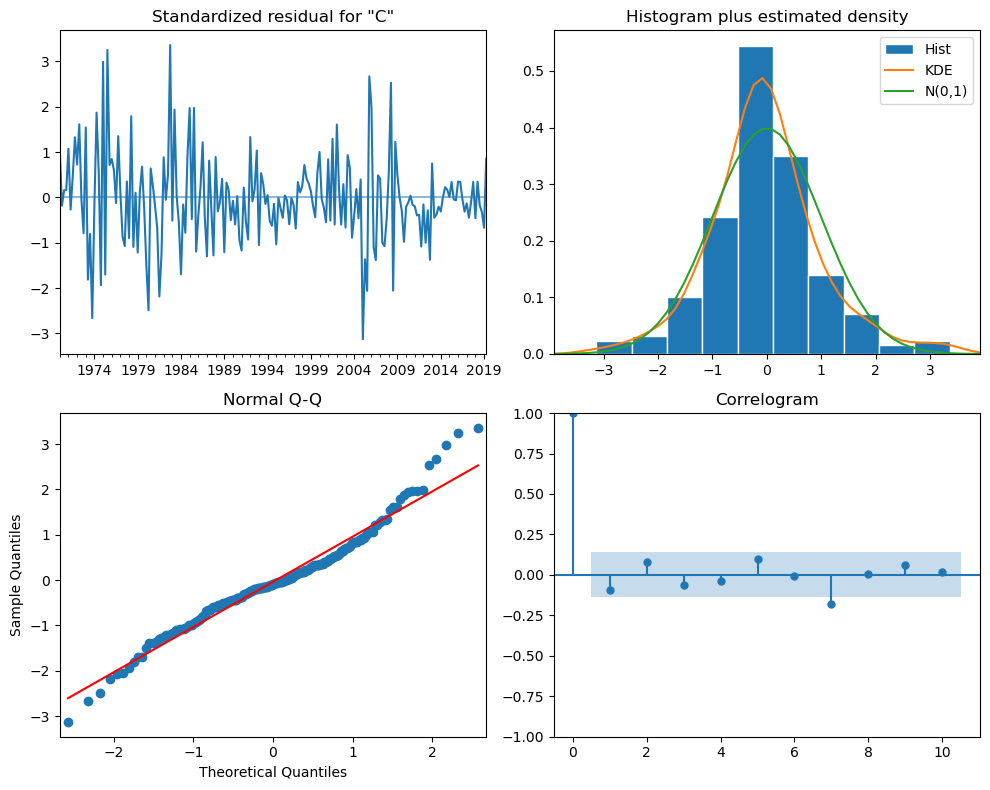

In [8]:
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

## 예제 7-2. ARIMA 오차 회귀 모델 예측

### 분기별 미국 소비 변화 ARIMA 오차 회귀 모델 예측

#### Adfuller test

In [9]:
print(adfuller(us_change["Consumption"][:193])[1])

0.00016836297275978277


#### 오차 차수 최적화

In [10]:
result = ARIMAX_optimizer(us_change["Consumption"][:193], us_change[ ["Income", "Production", "Savings", "Unemployment"] ][:193])
result

,p,q,AIC
0,2,3,114.373086
1,3,2,115.381423
2,3,3,122.236167
3,2,1,133.467188
4,3,0,144.711342
5,3,1,145.642510
6,2,0,146.763177
7,0,2,149.045441
8,1,1,150.019959
9,1,2,150.599096


#### ARIMAX모델 적합

In [11]:
model = SARIMAX(us_change["Consumption"][:193], us_change[ ["Income", "Production", "Savings", "Unemployment"] ][:193], order=(2, 0, 3), simple_differencing=False)
fit = model.fit(disp=False)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  193
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 -47.187
Date:                Fri, 14 Feb 2025   AIC                            114.373
Time:                        01:21:24   BIC                            147.000
Sample:                    01-01-1970   HQIC                           127.586
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Income           0.7504      0.030     25.043      0.000       0.692       0.809
Production       0.0423      0.028      1.486      0.137      -0.013       0.098
Savings         -0.0532      0.002    -27.074      0.000      -0.057      -0.049
Unemployment    -0.1860      0.141     -1.322      0.186      -0.462       0.090
ar.L1            0.0250      0.054      0.461      0.645      -0.081       0.131
ar.L2            0.9741      0.054     18.026      0.000       0.868       1.080
ma.L1           -0.1111      0.080     -1.396      0.163      -0.267       0.045
ma.L2           -0.9272      0.081    -11.461      0.000      -1.086      -0.769
ma.L3            0.0848      0.071      1.195      0.232      -0.054       0.224
sigma2           0.0941      0.008     11.105      0.000       0.077       0.111
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                22.84
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.36
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARIMAX 예측

In [12]:
forecast_result = fit.get_forecast(5, exog=us_change[ ["Income", "Production", "Savings", "Unemployment"] ].iloc[193:])
forecast_mean = forecast_result.predicted_mean
lower_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,0]
upper_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,1]
lower_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,0]
upper_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,1]

#### 예측 시각화

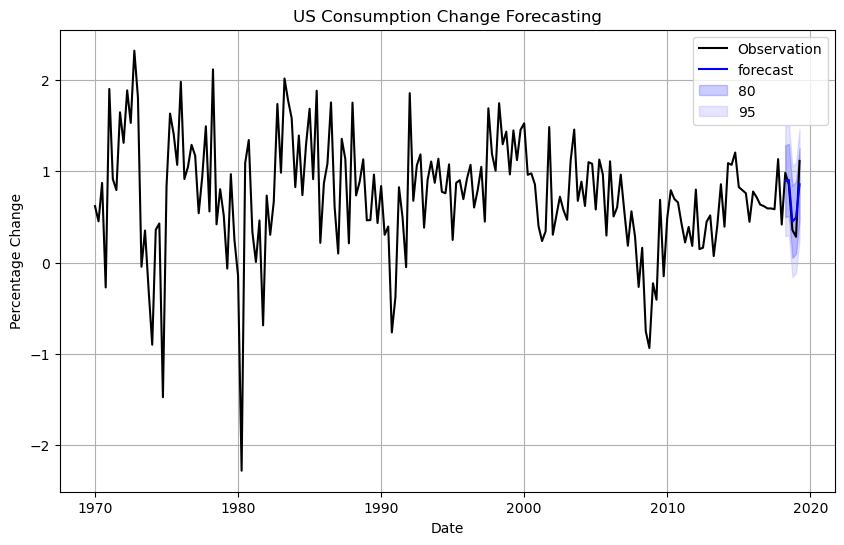

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(us_change["Consumption"], label='Observation', color='black')
plt.plot(forecast_mean, label='forecast', color='b')
plt.fill_between(forecast_mean.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_mean.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.title("US Consumption Change Forecasting")
plt.grid(True)
plt.legend()
plt.show()

## 예제 7-3. 결정적 추세와 확률적 추세 예시

### 호주 비행기 탑승객 수 결정적 추세와 확률적 추세를 활용한 예측

#### 필요한 패키지 불러오기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

#### 데이터 불러오기

In [15]:
aus_airpassengers = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.3/data/aus_airpassengers.cs')
aus_airpassengers['Year'] = pd.to_datetime(aus_airpassengers['Year'], format='%Y')
aus_airpassengers.index = aus_airpassengers['Year']
aus_airpassengers = aus_airpassengers[['Passengers']]
aus_airpassengers

,Passengers
Year,
1970-01-01,7.318700
1971-01-01,7.326600
1972-01-01,7.795600
1973-01-01,9.384600
1974-01-01,10.664700
1975-01-01,11.055100
1976-01-01,10.864300
1977-01-01,11.306500
1978-01-01,12.122300


#### 결정적 추세 모델 적합

In [16]:
time_trend = np.arange(len(aus_airpassengers))
model_deterministic = SARIMAX(aus_airpassengers['Passengers'], exog=time_trend, order=(1, 0, 0), trend='n', simple_differencing=False)
fit_deterministic = model_deterministic.fit(disp=False)

fit_deterministic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -100.943
Date:                Fri, 14 Feb 2025   AIC                            207.886
Time:                        01:21:25   BIC                            213.437
Sample:                    01-01-1970   HQIC                           209.975
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4606      0.257      5.674      0.000       0.956       1.965
ar.L1          0.9545      0.078     12.294      0.000       0.802       1.107
sigma2         4.0799      0.504      8.093      0.000       3.092       5.068
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               118.63
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 확률적 추세 모델 적합

In [17]:
model_stochastic = SARIMAX(aus_airpassengers['Passengers'], order=(0, 1, 0), trend='c', simple_differencing=False)
fit_stochastic = model_stochastic.fit(disp=False)

fit_stochastic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -98.156
Date:                Fri, 14 Feb 2025   AIC                            200.311
Time:                        01:21:25   BIC                            203.969
Sample:                    01-01-1970   HQIC                           201.681
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4191      0.367      3.866      0.000       0.700       2.139
sigma2         4.1777      0.489      8.552      0.000       3.220       5.135
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               129.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.63   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 결정적 추세 모델 예측

In [18]:
future_trend = np.arange(len(aus_airpassengers), len(aus_airpassengers) + 20)
forecast_deterministic = fit_deterministic.get_forecast(steps=20, exog=future_trend)
forecast_deterministic_mean = forecast_deterministic.predicted_mean
forecast_deterministic_ci = forecast_deterministic.conf_int(alpha=0.05)

#### 확률적 추세 모델 예측

In [19]:
forecast_stochastic = fit_stochastic.get_forecast(steps=20)
forecast_stochastic_mean = forecast_stochastic.predicted_mean
forecast_stochastic_ci = forecast_stochastic.conf_int(alpha=0.05)

#### 예측 시각화

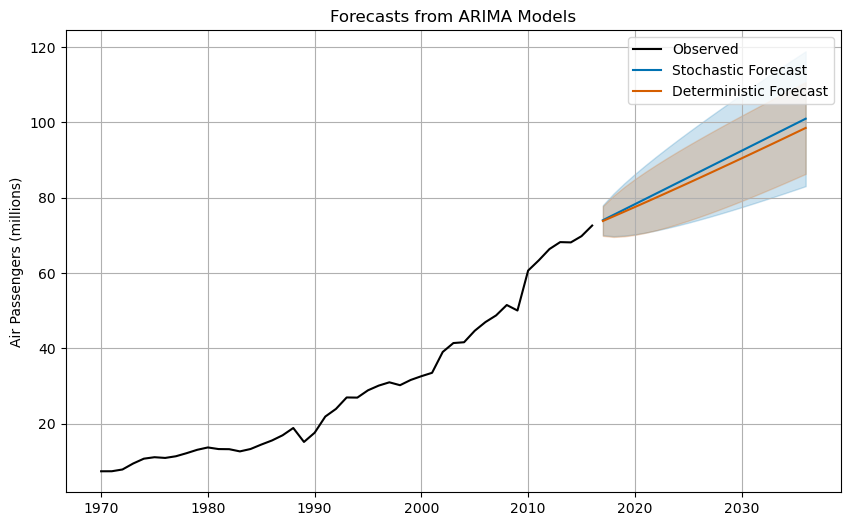

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label='Observed', color='black')

plt.plot(forecast_stochastic_mean, label='Stochastic Forecast', color='#0072B2')
plt.fill_between(forecast_stochastic_mean.index,
                 forecast_stochastic_ci.iloc[:, 0],
                 forecast_stochastic_ci.iloc[:, 1],
                 color='#0072B2', alpha=0.2)

plt.plot(forecast_deterministic_mean, label='Deterministic Forecast', color='#D55E00')
plt.fill_between(forecast_deterministic_mean.index,
                 forecast_deterministic_ci.iloc[:, 0],
                 forecast_deterministic_ci.iloc[:, 1],
                 color='#D55E00', alpha=0.2)

plt.ylabel('Air Passengers (millions)')
plt.title('Forecasts from ARIMA Models')
plt.legend()
plt.grid(True)
plt.show()

## 추세, 계절성 요소를 포함한 ARIMAX 모델 예시

### 호주 외식 서비스 회전율 ARIMAX 모델 적합

#### 필요한 패키지 불러오기

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### 데이터 불러오기

In [22]:
aus_retail = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.3/data/aus_retail.csv", index_col=0)
aus_retail['Month'] = pd.to_datetime(aus_retail['Month'], format='%Y %m')
aus_cafe = aus_retail[aus_retail['Industry'] == "Cafes, restaurants and takeaway food services"]
aus_cafe.index = aus_cafe['Month']
monthly_turnover = aus_cafe.groupby(aus_cafe['Month'])['Turnover'].sum()
monthly_turnover = monthly_turnover.loc['2004-01-01':]
monthly_turnover

Month
2004-01-01    1895.1
2004-02-01    1765.7
2004-03-01    1872.8
2004-04-01    1873.7
2004-05-01    1846.0
               ...  
2018-08-01    3908.2
2018-09-01    3863.2
2018-10-01    3929.1
2018-11-01    3934.4
2018-12-01    4278.9
Name: Turnover, Length: 180, dtype: float64

#### 데이터 시각화

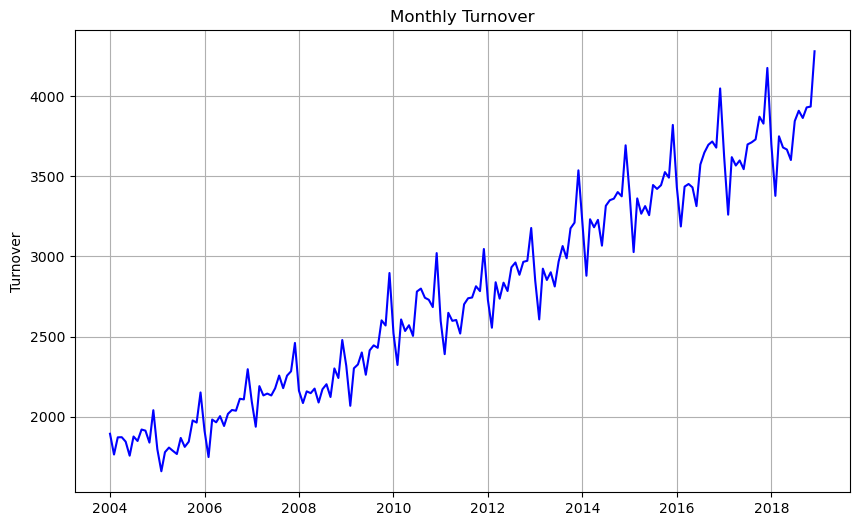

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_turnover,  color='b')

plt.ylabel('Turnover')
plt.title('Monthly Turnover')
plt.grid(True)

plt.show()

#### 푸리에 항 생성 함수

In [24]:
def fourier_series(x, K, period):
    n = len(x)
    t = np.arange(1, n + 1)
    results = pd.DataFrame(index=x.index)
    for k in range(1, K + 1):
        results[f'sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        results[f'cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return results

#### K에 따른 ARIMA 파라미터 사전 정의

In [25]:
arima_orders = {
    1: (2, 1, 3),
    2: (5, 1, 1),
    3: (3, 1, 1),
    4: (1, 1, 5),
    5: (2, 1, 0),
    6: (0, 1, 1)
}

#### 푸리에 오차 모델 적합 함수

In [26]:
def fit_arima_with_fourier(series, K, order):
    fourier_terms = fourier_series(monthly_turnover, K=K, period=12)

    model = SARIMAX(pd.Series(np.log(series), series.index), exog=fourier_terms, order=order, seasonal_order=(0, 0, 0, 12))
    return model.fit()

#### K에 따른 모델 적합

In [27]:
models = {}
aiccs = {}

for K in range(1, 7):
    arima_order = arima_orders[K] 
    model = fit_arima_with_fourier(monthly_turnover, K, arima_order)
    models[K] = model
    aiccs[K] = model.aicc

#### 예측 및 시각화

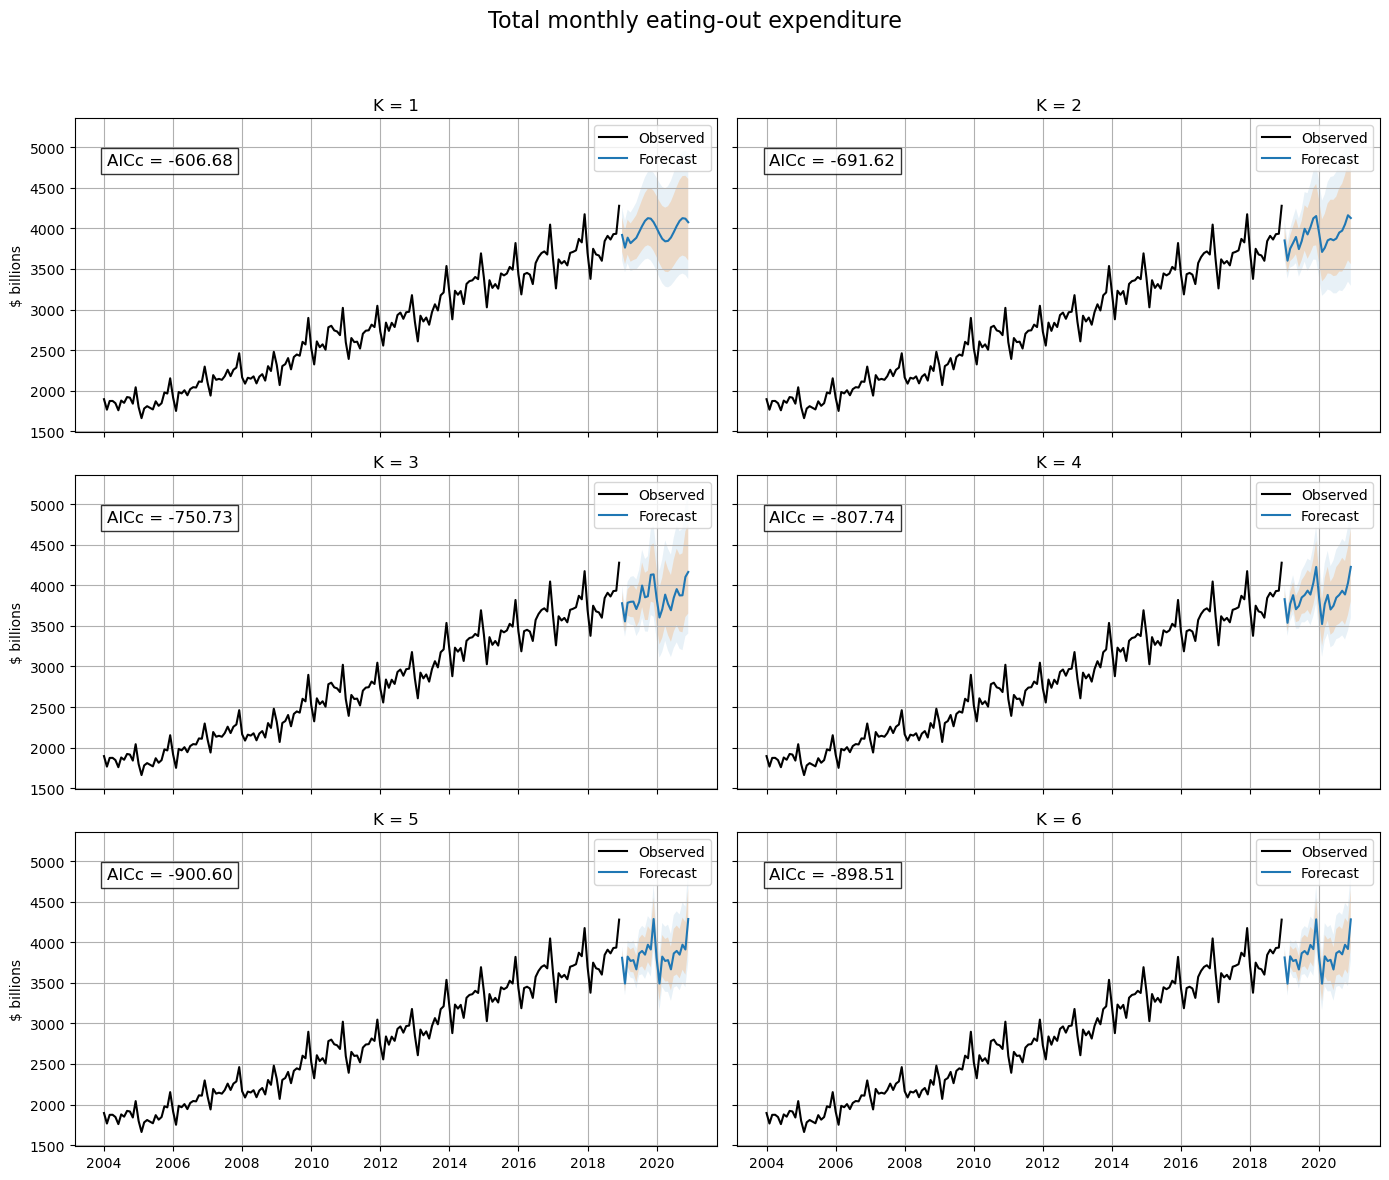

In [28]:
future_dates = pd.date_range(monthly_turnover.index[-1], periods=24 + 1, freq='M')[1:]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (K, model) in enumerate(models.items()):
    ax = axes[i]

    ax.plot(monthly_turnover, label='Observed', color='black')

    future_fourier = fourier_series(pd.Series(future_dates), K=K, period=12)
    forecast_result = model.get_forecast(steps=24, exog=future_fourier)
    forecast_mean = np.exp(forecast_result.predicted_mean)
    ci95 = np.exp(forecast_result.conf_int(alpha=0.05))
    ci80 = np.exp(forecast_result.conf_int(alpha=0.2))
    ax.plot(forecast_mean, label=f'Forecast')
    ax.fill_between(forecast_mean.index, ci95.iloc[:, 0], ci95.iloc[:, 1], alpha=0.1)
    ax.fill_between(forecast_mean.index, ci80.iloc[:, 0], ci80.iloc[:, 1], alpha=0.2)

    ax.text(0.05, 0.85, f'AICc = {aiccs[K]:.2f}', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    ax.set_title(f'K = {K}')
    if i % 2 == 0:
        ax.set_ylabel('$ billions')
    ax.legend()
    ax.grid(True)

plt.suptitle('Total monthly eating-out expenditure', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()